In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('models_results.csv')

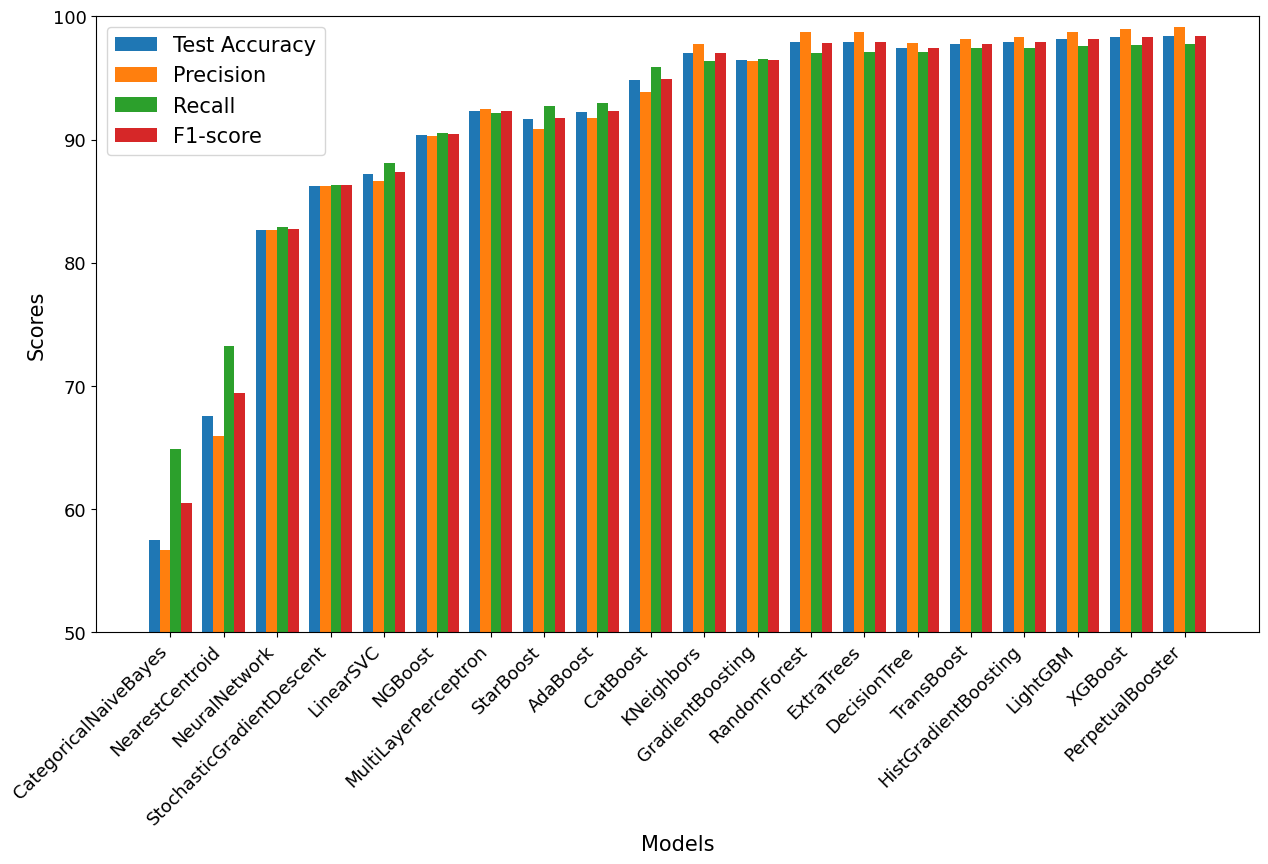

In [9]:
# Sort the DataFrame by accuracy in descending order
df_sorted = df.sort_values(by='Recall')

metrics = ['Test Accuracy', 'Precision', 'Recall', 'F1-score']
models = df_sorted['Name']

metrics_df = df_sorted[metrics]

fig, ax = plt.subplots(figsize=(15, 8))

# Define the bar width and positions
bar_width = 0.2
bar_positions = [i for i in range(len(models))]

# Plot each metric
for i, metric in enumerate(metrics):
    ax.bar([p + bar_width * i for p in bar_positions], metrics_df[metric], width=bar_width, label=metric)

# Set the x-ticks and labels
ax.set_xticks([p + bar_width * 1.5 for p in bar_positions])
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=13)  # Rotate labels

# Add labels and title
ax.set_xlabel('Models', fontsize=15)
ax.set_ylabel('Scores', fontsize=15)
ax.tick_params(axis='y', labelsize=13)
ax.legend(fontsize=15)

# Set y-axis limits to focus on the top half
ax.set_ylim(50, 100) 

# Show the plot
plt.show()

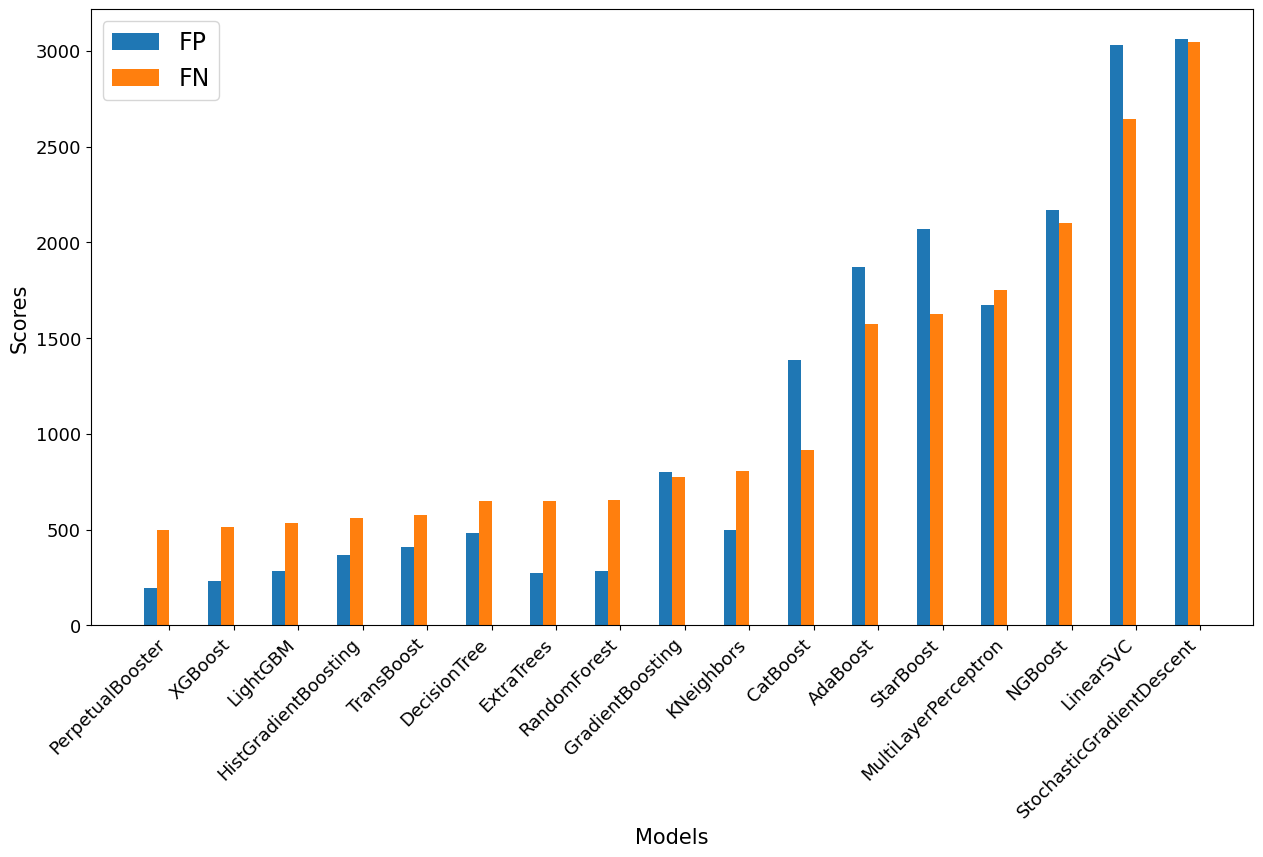

In [10]:
df_sorted = df.sort_values(by='FN').iloc[:-3]

metrics = ['FP', 'FN']
models = df_sorted['Name']

metrics_df = df_sorted[metrics]

fig, ax = plt.subplots(figsize=(15, 8))

# Define the bar width and positions
bar_width = 0.2
bar_positions = [i for i in range(len(models))]

# Plot each metric
for i, metric in enumerate(metrics):
    ax.bar([p + bar_width * i for p in bar_positions], metrics_df[metric], width=bar_width, label=metric)

# Set the x-ticks and labels
ax.set_xticks([p + bar_width * 1.5 for p in bar_positions])
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=13)  # Rotate labels

# Add labels and title
ax.set_xlabel('Models', fontsize=15)
ax.set_ylabel('Scores', fontsize=15)
ax.tick_params(axis='y', labelsize=13)
ax.legend(fontsize=17)

# Show the plot
plt.show()

C:\Users\Zio Phil\AppData\Local\Temp\ipykernel_1848\632272959.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(models, rotation=45, ha='right', fontsize=13)  # Rotate labels


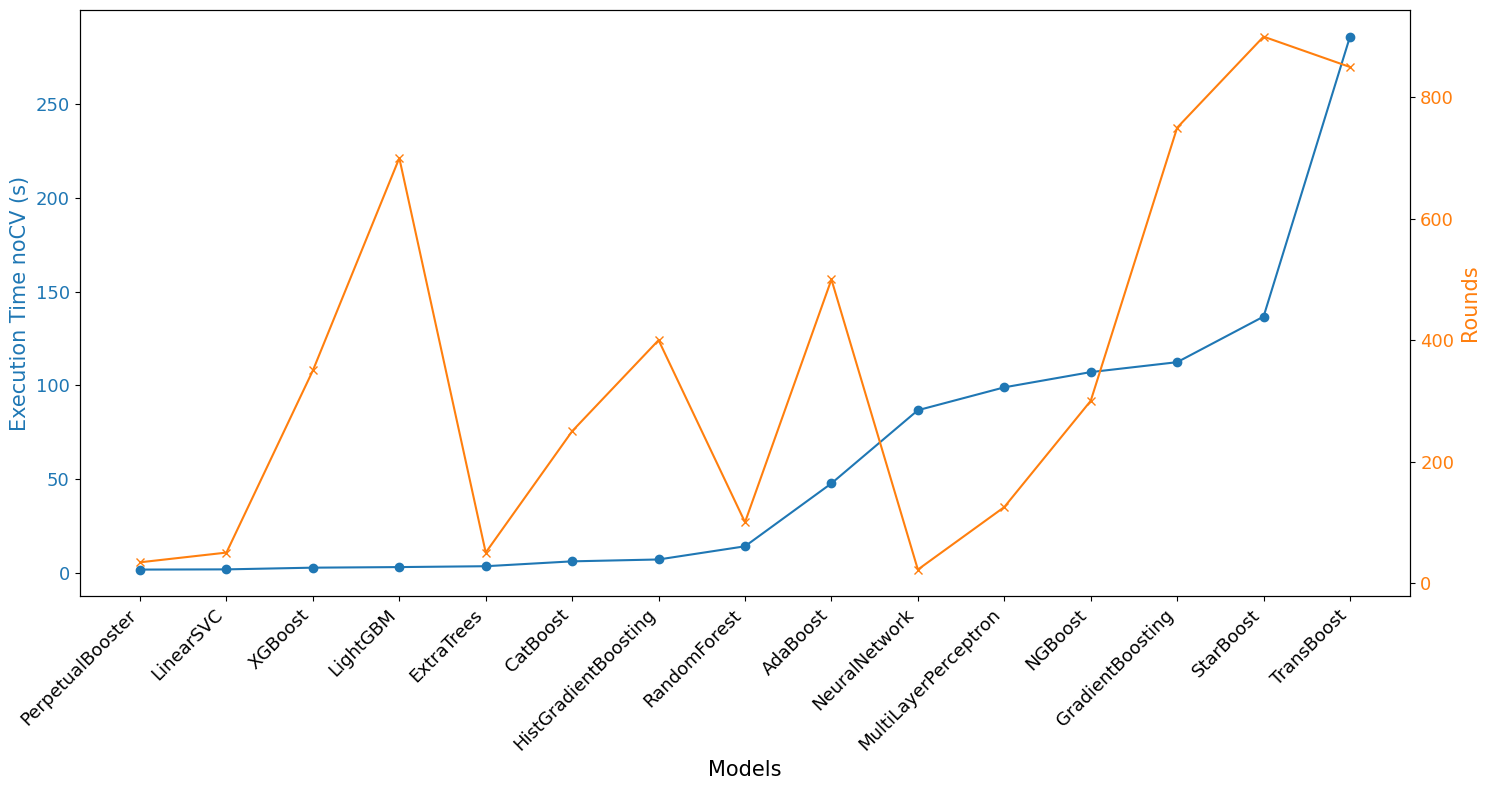

In [11]:
df_filtered = df.dropna(subset=['N Rounds'])
df_sorted = df_filtered.sort_values(by='Execution time NoCV  (s)')

models = df_sorted['Name']
execution_time = df_sorted['Execution time NoCV  (s)']
rounds = df_sorted['N Rounds']

fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot execution time
ax1.set_xlabel('Models', fontsize=15)
ax1.set_xticklabels(models, rotation=45, ha='right', fontsize=13)  # Rotate labels
ax1.set_ylabel('Execution Time noCV (s)', color='tab:blue', fontsize=15)
ax1.plot(models, execution_time, color='tab:blue', marker='o', label='Execution Time')
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=13)

# Create a second y-axis for the rounds
ax2 = ax1.twinx()
ax2.set_ylabel('Rounds', color='tab:orange', fontsize=15)
ax2.plot(models, rounds, color='tab:orange', marker='x', label='N Rounds')
ax2.tick_params(axis='y', labelcolor='tab:orange', labelsize=13)

fig.tight_layout()  # Adjust layout to prevent overlap

# Show the plot
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


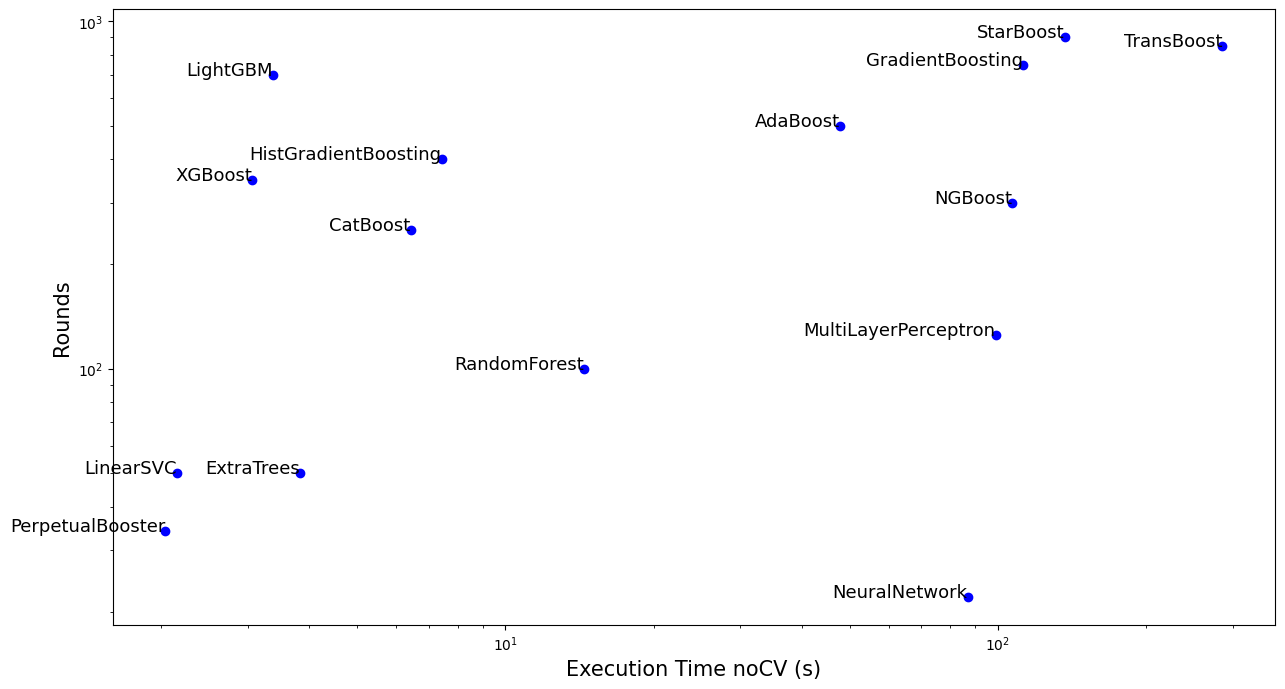

In [12]:
models = df['Name']
execution_time = df['Execution time NoCV  (s)']
rounds_per_second = df['N Rounds']

plt.figure(figsize=(15, 8))

# Create scatter plot
plt.scatter(execution_time, rounds_per_second, color='blue', marker='o')

# Add labels and title
for i, model in enumerate(models):
    plt.text(execution_time[i], rounds_per_second[i], model, fontsize=13, ha='right')

plt.xlabel('Execution Time noCV (s)', fontsize=15)
plt.ylabel('Rounds', fontsize=15)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)

plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.show()

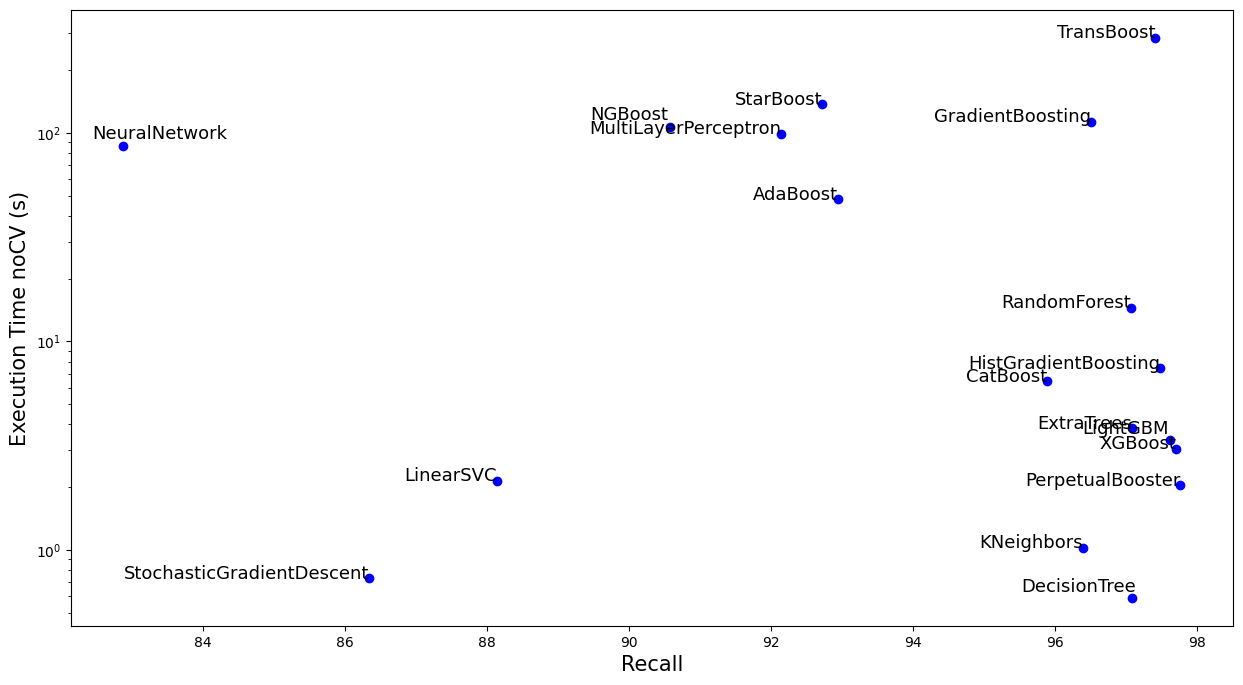

In [18]:
from adjustText import adjust_text

df_sorted = df.sort_values(by='Recall', ascending=False).iloc[:-2].reset_index(drop=True)

models = df_sorted['Name']
execution_time = df_sorted['Execution time NoCV  (s)']
recall = df_sorted['Recall']

plt.figure(figsize=(15, 8))

# Create scatter plot
plt.scatter(recall, execution_time, color='blue', marker='o')

# Add labels and title
texts=[]
for i, model in enumerate(models):
    text = plt.text(recall[i], execution_time[i], model, fontsize=13, ha='right')
    texts.append(text)

plt.xlabel('Recall', fontsize=15)
plt.ylabel('Execution Time noCV (s)', fontsize=15)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)

plt.yscale('log')

indexes_to_adjust = [2, 6, 14, 17]
texts_to_adjust = [texts[i] for i in indexes_to_adjust]
adjust_text(texts_to_adjust) # to make sure text dont overlaps

# Show the plot
plt.show()

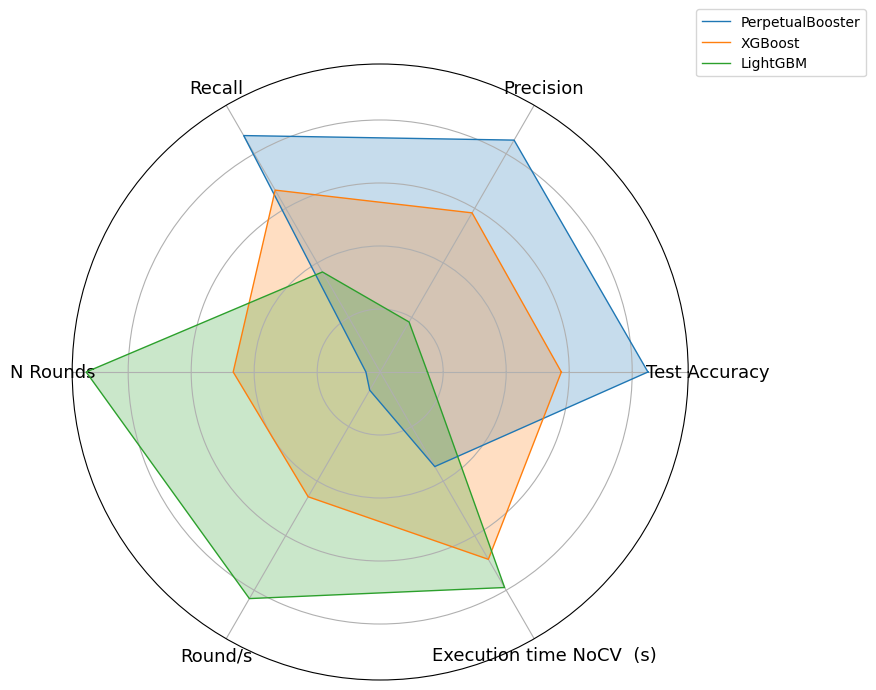

In [14]:
df_sorted = df.sort_values(by='Recall', ascending=False).iloc[:3].reset_index(drop=True)

metrics = ['Test Accuracy', 'Precision', 'Recall', 'N Rounds', 'Round/s', 'Execution time NoCV  (s)']

# Define custom min and max values for each axis to represent it better
custom_min_max = {
    'Test Accuracy': (98.10, 98.50),
    'Precision': (98.60, 99.20),
    'Recall': (97.50, 97.80),
    'N Rounds': (0, 750),
    'Execution time NoCV  (s)': (1.00, 4.00),
    'Round/s': (0, 250)
}


df_normalized = df_sorted.copy()
for metric in metrics:
    min_val, max_val = custom_min_max[metric]
    df_normalized[metric] = (df_sorted[metric] - min_val) / (max_val - min_val)
        
# Number of variables we're plotting
num_vars = len(metrics)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar chart is a circle, so we need to "complete the loop"
# and append the start to the end.
angles += angles[:1]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each model
for i, row in df_normalized.iterrows():
    values = row[metrics].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=row['Name'])
    ax.fill(angles, values, alpha=0.25)

# Add labels for each metric
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=13)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Show the plot
plt.show()